In [163]:
import pandas as pd

In [164]:
df = pd.read_csv('train_data.csv')

# Checking data properties

Checking dataset size

Analysis: there are 12047 rows and only 2 columns

In [165]:
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Total rows: 12047
Total columns: 2


Checking for missing values

In [166]:
print(df.isnull().sum())

question    0
answer      0
dtype: int64


Checking unique questions and answers

In [167]:
print(f"Unique questions: {df['question'].nunique()}")
print(f"Unique questions: {df['answer'].nunique()}")

Unique questions: 5785
Unique questions: 12047


# Data Cleaning

- remove unnecesary characters
- keep currency, percentages and numbers
- strip extra space
- for consistency, put to lower case

In [168]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    pattern = r'[^a-zA-Z0-9$€£¥%.\s]'
    cleaned = re.sub(pattern, '', text)
    cleaned = cleaned.strip().lower()
    cleaned = " ".join([word for word in cleaned.split() if word not in stop_words])
    return cleaned

df['question_clean'] = df['question'].apply(clean_text)
df['answer_clean'] = df['answer'].apply(clean_text)
df.head(3)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tshmacm1171/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,question,answer,question_clean,answer_clean
0,Would I ever need credit card if my debit card...,Skimmers are most likely at gas station pumps....,would ever need credit card debit card issued ...,skimmers likely gas station pumps. debit card ...
1,Cheapest way to wire or withdraw money from US...,There is a number of cheaper online options th...,cheapest way wire withdraw money us account li...,number cheaper online options could use. tranf...
2,How do I go about finding an honest ethical f...,Large and wellknown companies are typically a ...,go finding honest ethical financial advisor,large wellknown companies typically good start...


# Most common words

# Word Cloud

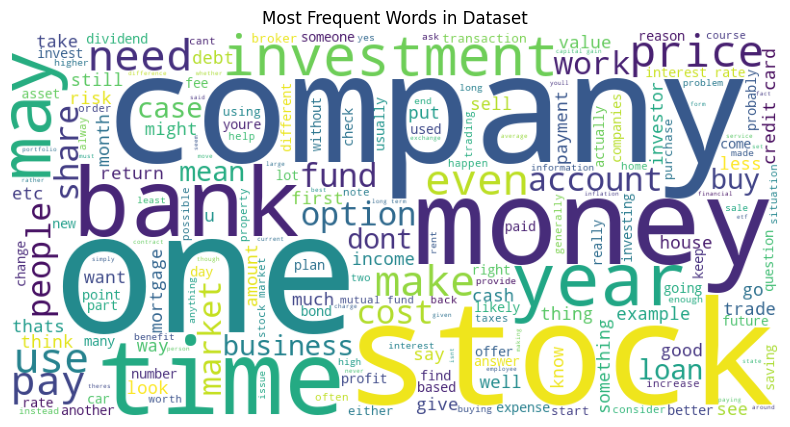

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df['question_clean']) + " " + " ".join(df['answer_clean'])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Frequent Words in Dataset")
plt.show()


# N-grams

here we want to know word pairs or common phrases found in the dataset e.g "machine learning", "natural language processing"

In [170]:
import nltk
from nltk.util import ngrams
from collections import Counter


tokens = all_text.split()


bigrams = list(ngrams(tokens, 2)) 
trigrams = list(ngrams(tokens, 3))


bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)


print("Top Bigrams:", bigram_counts.most_common(20))
print("Top Trigrams:", trigram_counts.most_common(20))


Top Bigrams: [(('credit', 'card'), 1362), (('stock', 'market'), 847), (('long', 'term'), 675), (('interest', 'rate'), 615), (('interest', 'rates'), 594), (('real', 'estate'), 584), (('capital', 'gains'), 577), (('make', 'sure'), 516), (('mutual', 'fund'), 492), (('stock', 'price'), 485), (('credit', 'cards'), 480), (('mutual', 'funds'), 470), (('dont', 'know'), 446), (('make', 'money'), 435), (('income', 'tax'), 424), (('bank', 'account'), 374), (('short', 'term'), 344), (('share', 'price'), 340), (('savings', 'account'), 307), (('index', 'funds'), 306)]
Top Trigrams: [(('capital', 'gains', 'tax'), 109), (('credit', 'card', 'debt'), 91), (('credit', 'card', 'company'), 90), (('sp', '500', 'index'), 70), (('pay', 'credit', 'card'), 60), (('fair', 'market', 'value'), 60), (('dollar', 'cost', 'averaging'), 57), (('credit', 'card', 'companies'), 54), (('use', 'credit', 'card'), 48), (('capital', 'gains', 'taxes'), 47), (('using', 'credit', 'card'), 45), (('long', 'term', 'capital'), 45), (

In [ ]:

bigram_labels = [" ".join(bigram) for bigram, _ in bigram_counts.most_common(20)]
bigram_values = [count for _, count in bigram_counts.most_common(20)]

trigram_labels = [" ".join(trigram) for trigram, _ in trigram_counts.most_common(20)]
trigram_values = [count for _, count in trigram_counts.most_common(20)]

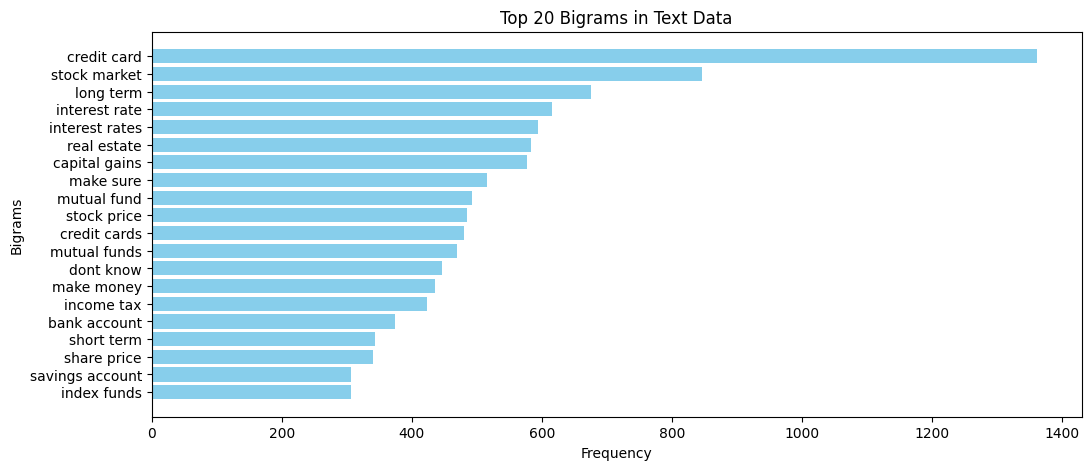

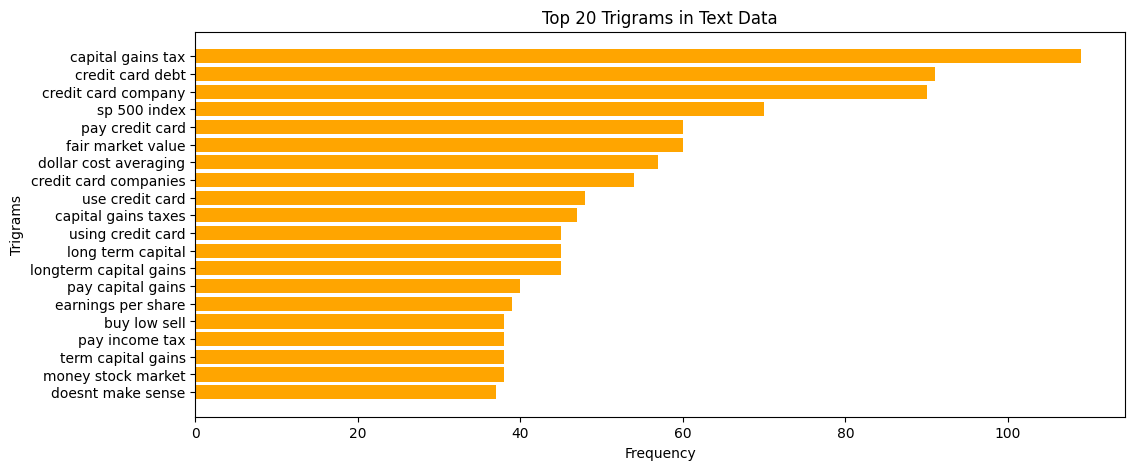

In [172]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.barh(bigram_labels, bigram_values, color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 20 Bigrams in Text Data")
plt.gca().invert_yaxis() 
plt.show()


plt.figure(figsize=(12, 5))
plt.barh(trigram_labels, trigram_values, color="orange")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("Top 20 Trigrams in Text Data")
plt.gca().invert_yaxis()
plt.show()

# Rare Words

Number of rare words: 23326
Sample rare words: ['probablity', 'tranches', 'otcmkts', 'aamrq', 'nso', 'cashoutconstruction', 'goldsiver', 'nonbanks', 'reasonability', 'shortsellng', 'exerciseandhold', 'exerciseandselltocover', 'overcharged', 'startend', 'plethora', 'euforeigners', 'appstore', '501c7', 'epresent', 'pronunciation']


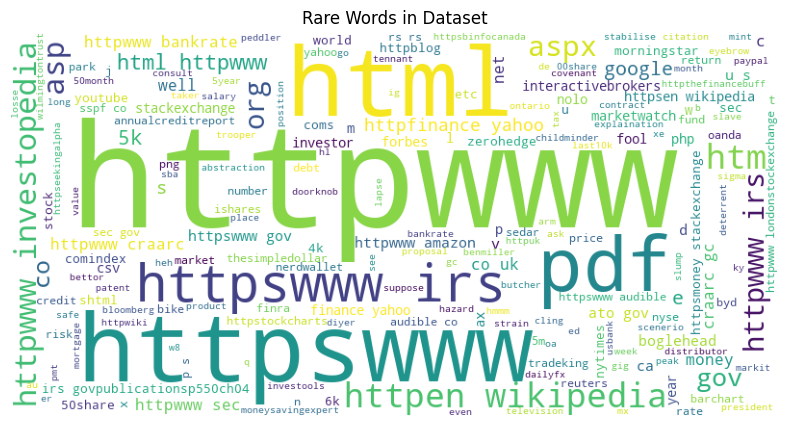

In [177]:
rare_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(rare_words))

print(f"Number of rare words: {len(rare_words)}")
print("Sample rare words:", rare_words[:20])  


plt.figure(figsize=(10, 5))
plt.imshow(rare_wordcloud)
plt.axis("off")
plt.title("Rare Words in Dataset")
plt.show()